In [3]:
import pandas as pd

# Carga el archivo con separador correcto y codificación UTF-8
df = pd.read_csv('../data/viviendas_turisticas_canarias.csv', sep=';', encoding='utf-8')

# Muestra primeras filas
df.head()


C:\Users\moise\AppData\Local\Temp\ipykernel_14948\480359529.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/viviendas_turisticas_canarias.csv', sep=';', encoding='utf-8')


,establecimiento_id,establecimiento_nombre_comercial,establecimiento_modalidad,establecimiento_tipologia,establecimiento_clasificacion,direccion,direccion_isla_nombre,direccion_provincia_nombre,direccion_municipio_nombre,direccion_localidad_nombre,direccion_codigo_postal,numero_dormitorios_individuales_explotacion,numero_dormitorios_dobles_explotacion,plazas,longitud,latitud
0,A-38-4-0000685,Casa Tinali,Extrahotelera,Vivienda Vacacional,Categoria Unica,C/. Oroteanda Baja Nº 14,Tenerife,Santa Cruz De Tenerife,San Miguel De Abona,San Miguel De Abona,38639,0.0,0.0,10,-16.636038,28.044253
1,A-38-4-0000719,La Casita De La Playa,Extrahotelera,Vivienda Vacacional,Categoria Unica,"Paseo De La Playa, 4 4",Tenerife,Santa Cruz De Tenerife,Santa Cruz Tenerife,Santa Cruz De Tenerife,38140,0.0,0.0,2,-16.152085,28.523419
2,A-38-4-0000720,La Fortaleza,Extrahotelera,Vivienda Vacacional,Categoria Unica,"C/ Doctor Virgos Pinto, 12-A",Tenerife,Santa Cruz De Tenerife,El Tanque,Tanque (El),38435,0.0,0.0,4,-16.780998,28.357188
3,A-38-4-0000721,Sara,Extrahotelera,Vivienda Vacacional,Categoria Unica,"C/ Violeta Del Teide, 8 8",Tenerife,Santa Cruz De Tenerife,La Orotava,Orotava (La),38300,0.0,0.0,4,-16.533341,28.403917
4,A-38-4-0000722,Casa Vacacional El Mar,Extrahotelera,Vivienda Vacacional,Categoria Unica,"C/ Ribera Del Mar, 16",Tenerife,Santa Cruz De Tenerife,San Juan De La Rambla,San Juan De La Rambla,38420,0.0,0.0,4,-16.629555,28.395336


In [4]:
# Conteo de viviendas por municipio
viviendas_por_municipio = df['direccion_municipio_nombre'].value_counts().sort_values(ascending=False)

# Mostramos los 10 primeros
viviendas_por_municipio.head(10)


direccion_municipio_nombre
Arona                         6603
Adeje                         5737
Las Palmas De Gran Canaria    5459
La Oliva                      5100
San Bartolome De Tirajana     4581
Mogan                         3004
Yaiza                         2946
Tias                          2819
Santa Cruz Tenerife           2293
Teguise                       2111
Name: count, dtype: int64

In [5]:
# Filtramos solo las viviendas de Tenerife
df_tenerife = df[df['direccion_isla_nombre'].str.lower() == 'tenerife']


In [8]:
# Conteo de viviendas por municipio solo en Tenerife
viviendas_por_municipio_tf = df_tenerife['direccion_municipio_nombre'].value_counts().sort_values(ascending=False)

# Mostramos los primeros 10
viviendas_por_municipio_tf.head(50)


direccion_municipio_nombre
Arona                         6602
Adeje                         5736
Santa Cruz Tenerife           2292
Granadilla De Abona           2070
Puerto De La Cruz             1966
San Miguel De Abona           1514
Santiago Del Teide            1511
San Cristobal De La Laguna    1146
Guia Isora                     866
Arico                          767
Icod De Los Vinos              765
Candelaria                     637
Guimar                         513
Tacoronte                      448
El Rosario                     446
La Orotava                     407
Santa Ursula                   399
Los Realejos                   348
La Matanza De Acentejo         216
Garachico                      212
El Sauzal                      153
Los Silos                      131
Buenavista Del Norte           101
La Guancha                     100
Fasnia                          88
Tegueste                        85
La Victoria De Acentejo         79
Vilaflor De Chasna          

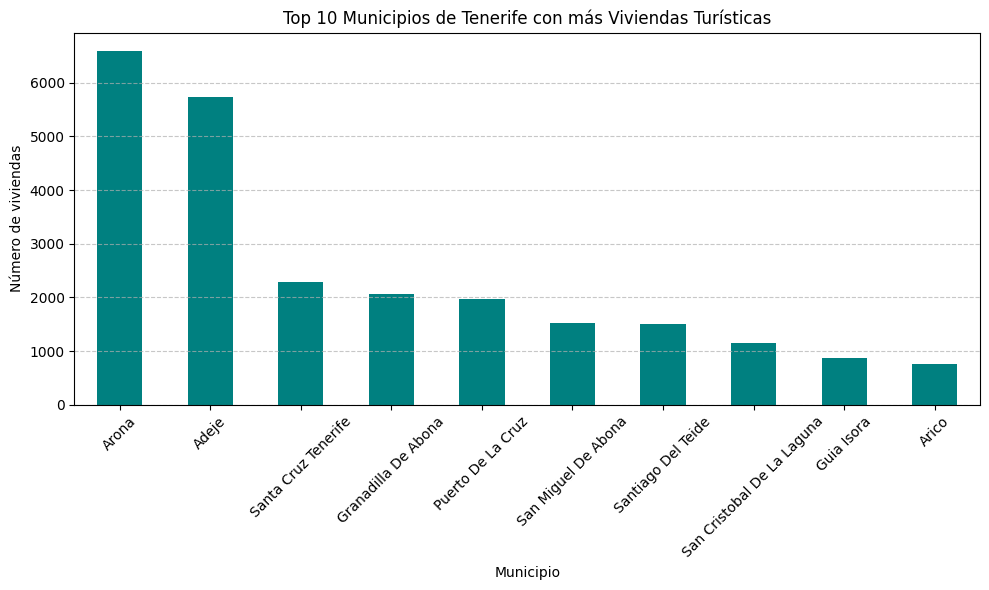

In [9]:
import matplotlib.pyplot as plt

# Gráfico de barras para los 10 municipios con más viviendas turísticas
top_municipios = viviendas_por_municipio_tf.head(10)

plt.figure(figsize=(10, 6))
top_municipios.plot(kind='bar', color='teal')
plt.title('Top 10 Municipios de Tenerife con más Viviendas Turísticas')
plt.xlabel('Municipio')
plt.ylabel('Número de viviendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
df_tenerife.info()


<class 'pandas.core.frame.DataFrame'>
Index: 29897 entries, 0 to 67223
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   establecimiento_id                           29897 non-null  object 
 1   establecimiento_nombre_comercial             29894 non-null  object 
 2   establecimiento_modalidad                    29897 non-null  object 
 3   establecimiento_tipologia                    29897 non-null  object 
 4   establecimiento_clasificacion                29897 non-null  object 
 5   direccion                                    29897 non-null  object 
 6   direccion_isla_nombre                        29897 non-null  object 
 7   direccion_provincia_nombre                   29897 non-null  object 
 8   direccion_municipio_nombre                   29897 non-null  object 
 9   direccion_localidad_nombre                   29897 non-null  object 
 10  dir

In [12]:
df_tenerife[['latitud', 'longitud']].dropna().shape


(29897, 2)

In [ ]:
import folium

# Mapa centrado en Tenerife
m = folium.Map(location=[28.2916, -16.6291], zoom_start=10)

# Agrega puntos al mapa
for _, row in df_tenerife.iterrows():
    if pd.notnull(row['latitud']) and pd.notnull(row['longitud']):
        folium.CircleMarker(
            location=[row['latitud'], row['longitud']],
            radius=2,
            color='blue',
            fill=True,
            fill_opacity=0.6
        ).add_to(m)

m


In [16]:
import folium
from folium.plugins import MarkerCluster

# Filtra los que tienen coordenadas válidas
df_mapa = df_tenerife.dropna(subset=['latitud', 'longitud'])

# Crea el mapa centrado en Tenerife
m = folium.Map(location=[28.2916, -16.6291], zoom_start=10)

# Agrupar marcadores para mejor visualización
marker_cluster = MarkerCluster().add_to(m)

# Añadir marcadores al cluster
for _, row in df_mapa.iterrows():
    popup_text = f"""
    <b>🏷️ {row['establecimiento_nombre_comercial']}</b><br>
    🛏️ Dormitorios indiv.: {row['numero_dormitorios_individuales_explotacion']}<br>
    🛏️ Dormitorios dobles: {row['numero_dormitorios_dobles_explotacion']}<br>
    👥 Plazas: {row['plazas']}
    """
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=4,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        tooltip=popup_text
    ).add_to(marker_cluster)

# Guardar el mapa como archivo HTML
m.save('../app/mapa_tenerife.html')


In [17]:
import folium

# Crear mapa base centrado en Tenerife
m = folium.Map(location=[28.2916, -16.6291], zoom_start=10)

# Añadir marcador de prueba
folium.Marker(
    location=[28.2916, -16.6291],
    popup="Centro de Tenerife"
).add_to(m)

# Guardar
m.save("mapa_test.html")


In [ ]:
for _, row in df_tenerife.iterrows():
    if pd.notnull(row['latitud']) and pd.notnull(row['longitud']):
        popup_info = f"""
        <b>{row['establecimiento_nombre_comercial']}</b><br>
        Plazas: {int(row['plazas']) if pd.notnull(row['plazas']) else 'N/A'}<br>
        Dormitorios individuales: {int(row['numero_dormitorios_individuales_explotacion']) if pd.notnull(row['numero_dormitorios_individuales_explotacion']) else 'N/A'}<br>
        Dormitorios dobles: {int(row['numero_dormitorios_dobles_explotacion']) if pd.notnull(row['numero_dormitorios_dobles_explotacion']) else 'N/A'}
        """

        folium.CircleMarker(
            location=[row['latitud'], row['longitud']],
            radius=2,
            color='blue',
            fill=True,
            fill_opacity=0.6,
            popup=folium.Popup(popup_info, max_width=250)
        ).add_to(m)
# Guardar
m.save("mapa_tenerife_pop.html")